In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('desktop/COVID-19 ANALYSIS/OpenLine.csv')

In [3]:
len(data)

14126

In [4]:
data.drop(['Unnamed: '+str(x) for x in range(33,45)],axis=1,inplace=True)

In [5]:
data['outcome'].unique()

array([nan, 'discharged', 'discharge', 'died', 'Discharged', '05.02.2020',
       'death',
       'Symptoms only improved with cough. Currently hospitalized for follow-up.',
       'recovered', 'stable',
       'critical condition, intubated as of 14.02.2020',
       'treated in an intensive care unit (14.02.2020)', 'severe'],
      dtype=object)

In [6]:
def clean(x):
    if x == 'death' or x == 'died' or x == 'Death':
        return 'death'
    elif x == 'discharged' or x=='discharge':
        return 'discharge'
    elif x == 'recovered' or x=='stable':
        return 'recovered'
    else:
        return np.nan

In [7]:
def apply_int(x):
    try:
        y = int(x)
        return y
    except:
        return np.nan

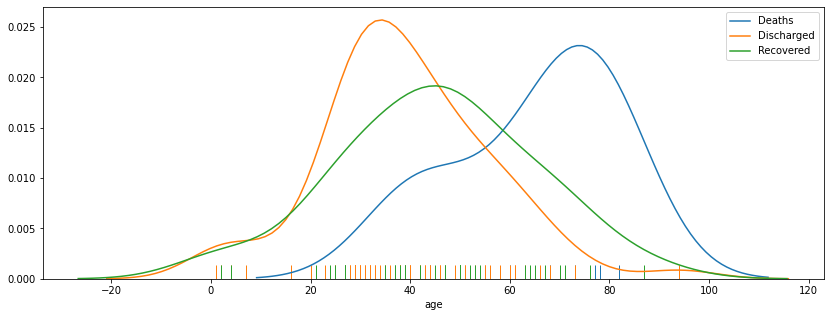

In [8]:
#age distributions of those who died, were discharged, or recovered.
f = plt.figure(figsize=(14,5))
sns.distplot(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int),hist=False,rug=True,label='Deaths')
sns.distplot(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int),hist=False,rug=True,label='Discharged')
sns.distplot(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int),hist=False,rug=True,label='Recovered')

plt.legend()
plt.show()

f.savefig("/users/manu/Desktop/COVID-Graphs/foo.pdf", bbox_inches='tight')

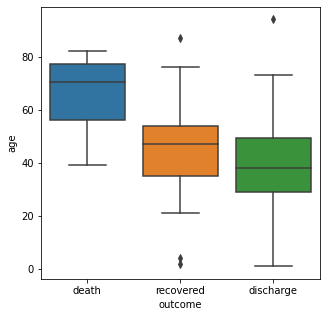

In [9]:
df1 = pd.DataFrame(data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int)).assign(outcome='death')
df3 = pd.DataFrame(data[data['outcome'].apply(clean)=='discharge']['age'].apply(apply_int)).assign(outcome='discharge')
df2 = pd.DataFrame(data[data['outcome'].apply(clean)=='recovered']['age'].apply(apply_int)).assign(outcome='recovered')
cdf = pd.concat([df1, df2, df3])
plt.figure(figsize=(5,5))
sns.boxplot(x="outcome", y="age", data=cdf)  # RUN PLOT   
plt.show()

In [10]:
data[data['outcome'].apply(clean)=='death']['age'].apply(apply_int) .mean()
#average age of all deaths. To adapt the code for other outcomes, simply substitute ‘death’ with other outcomes.

65.125

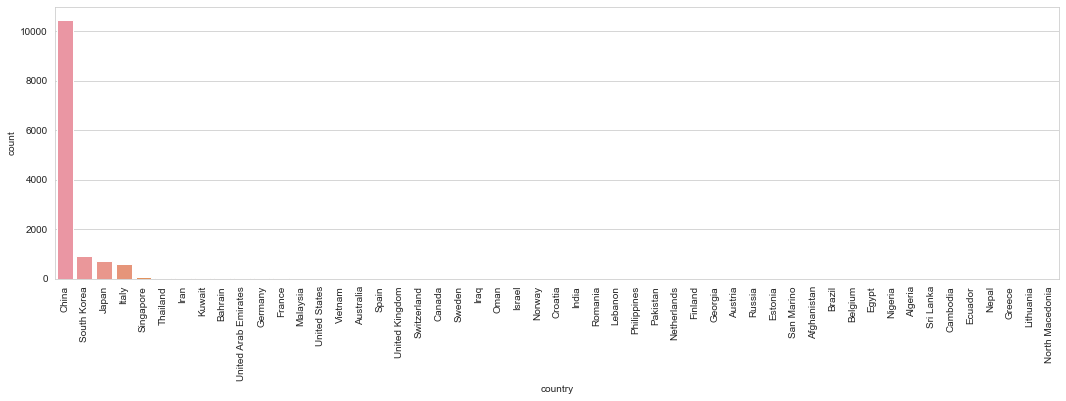

In [11]:
#How many cases are there across countries?
#How does the spread differ among continents?
fig = plt.figure(figsize=(18,5))
sns.set_style('whitegrid')
sns.countplot(data['country'],order=data['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

fig.savefig("/users/manu/Desktop/Wchina.pdf", bbox_inches='tight')

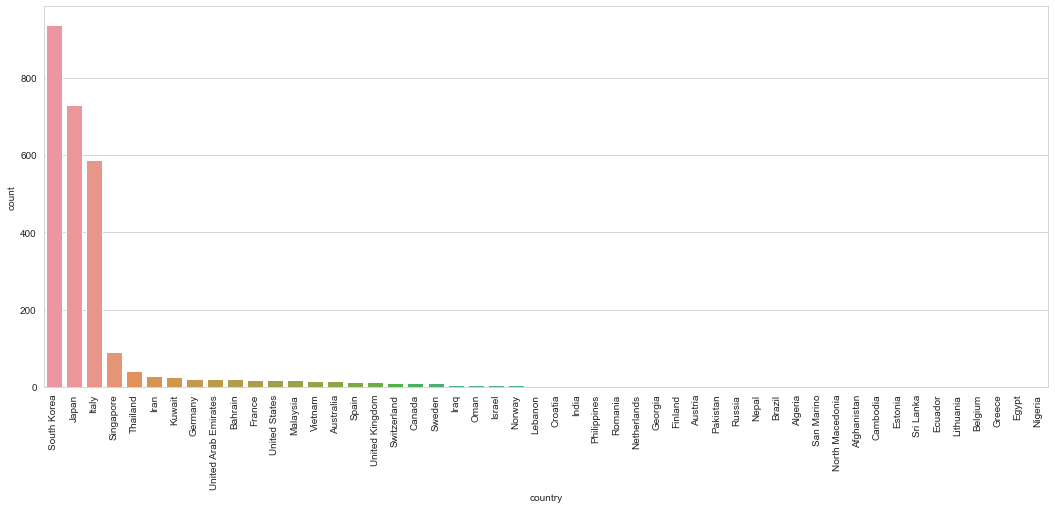

In [12]:
#Same data as above, but without China
fig = plt.figure(figsize=(18,7))
sns.set_style('whitegrid')
sns.countplot(data[data['country'] != 'China']['country'],order=data[data['country'] != 'China']['country'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

f.savefig("/users/manu/Desktop/WIchina.pdf", bbox_inches='tight')

In [9]:
data = pd.read_csv('desktop/TimeS.csv')


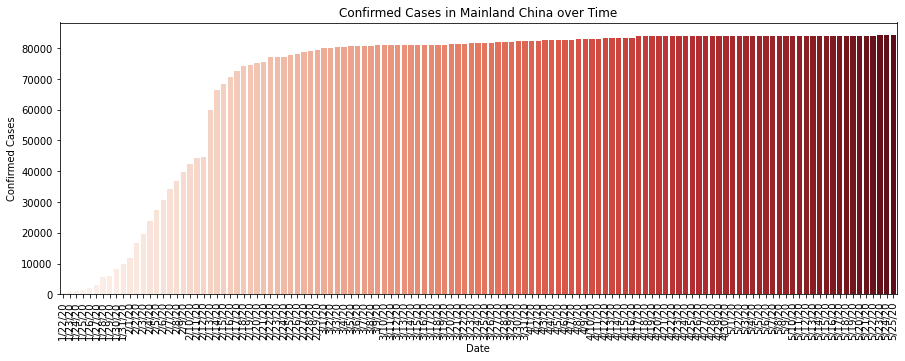

In [10]:
#You can see the cases for ANY country. To do that, just replace the "US" in the line below to the country of your choice.
plot_data = data[data['Country/Region']=='China'].sum().drop(['Province/State','Country/Region','Lat','Long'])
g = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Reds')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mainland China over Time")
plt.show()

g.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Confirmed_China.pdf", bbox_inches='tight')

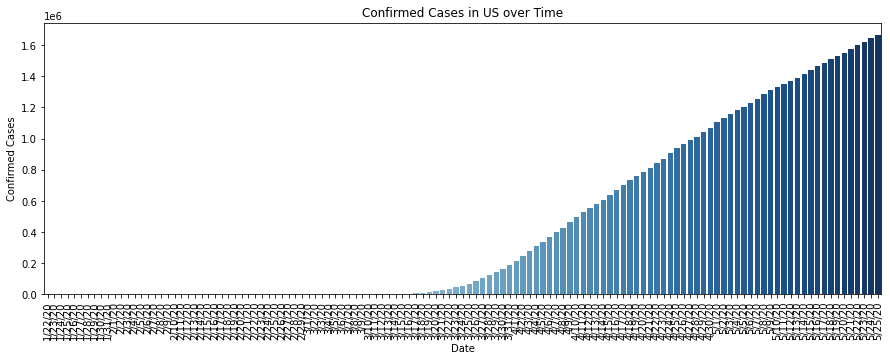

In [12]:
plot_data = data[data['Country/Region']=='US'].sum().drop(['Province/State','Country/Region','Lat','Long'])
h = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Blues')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in US over Time")
plt.show()

h.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/US_Confirmed.pdf", bbox_inches='tight')

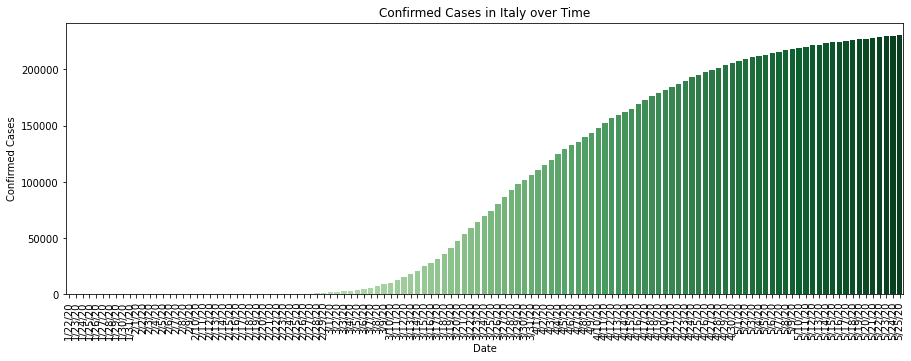

In [13]:
plot_data = data[data['Country/Region']=='Italy'].sum().drop(['Province/State','Country/Region','Lat','Long'])
j = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Greens')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Italy over Time")
plt.show()

j.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Italy_Confirmed.pdf", bbox_inches='tight')

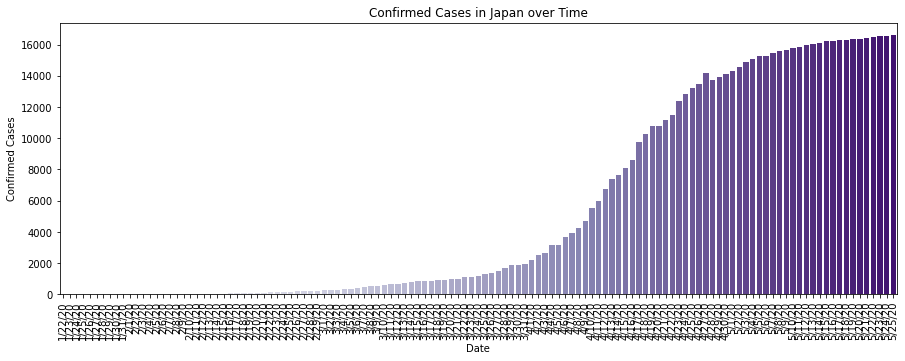

In [14]:
plot_data = data[data['Country/Region']=='Japan'].sum().drop(['Province/State','Country/Region','Lat','Long'])
k = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='Purples')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Japan over Time")
plt.show()

k.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Japan_Confirmed.pdf", bbox_inches='tight')

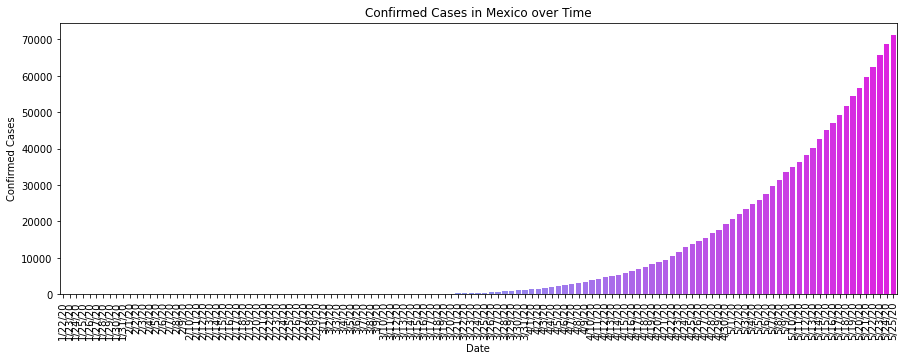

In [15]:
plot_data = data[data['Country/Region']=='Mexico'].sum().drop(['Province/State','Country/Region','Lat','Long'])
m = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='cool')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Mexico over Time")
plt.show()

m.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Mexico.pdf", bbox_inches='tight')

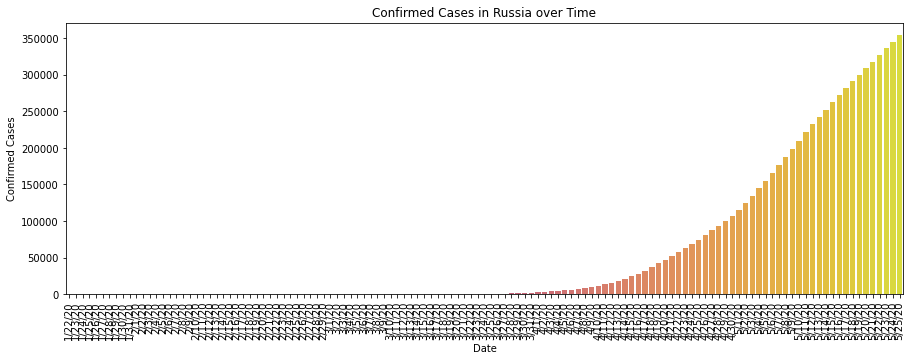

In [16]:
plot_data = data[data['Country/Region']=='Russia'].sum().drop(['Province/State','Country/Region','Lat','Long'])
n = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='plasma')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Russia over Time")
plt.show()

n.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Russia_confirmed.pdf", bbox_inches='tight')

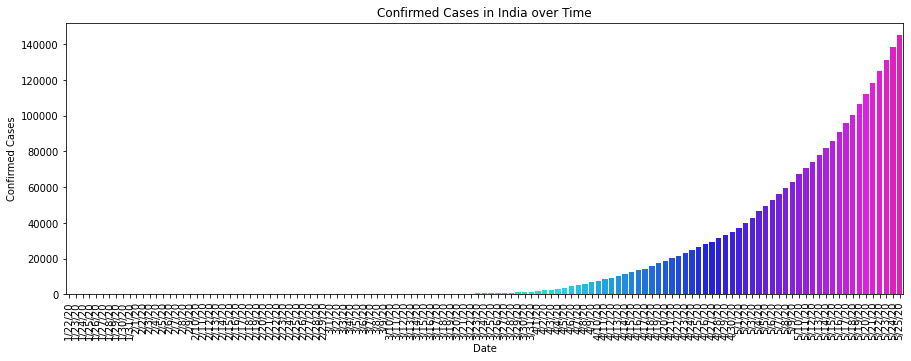

In [17]:
plot_data = data[data['Country/Region']=='India'].sum().drop(['Province/State','Country/Region','Lat','Long'])
q = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='gist_rainbow')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in India over Time")
plt.show()

q.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/India_Confirmed.pdf", bbox_inches='tight')

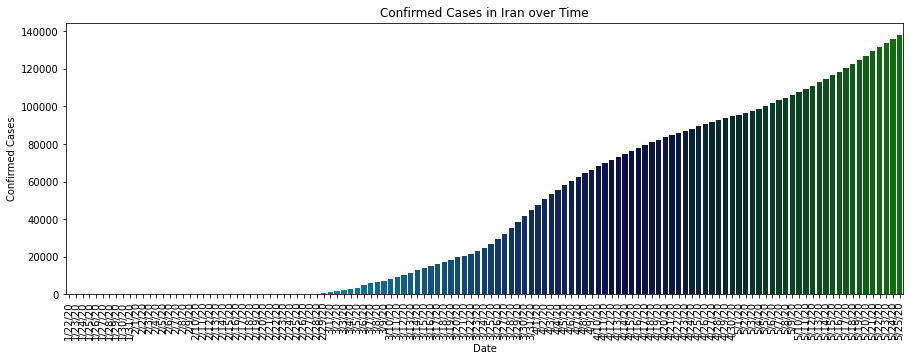

In [18]:
plot_data = data[data['Country/Region']=='Iran'].sum().drop(['Province/State','Country/Region','Lat','Long'])
r = plt.figure(figsize=(15,5))
sns.barplot(plot_data.index,plot_data,palette='ocean_r')
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("Confirmed Cases in Iran over Time")
plt.show()

r.savefig("/users/manu/Desktop/COVID-CONFIMED-MAY/Iran_Confirmed.pdf", bbox_inches='tight')

In [23]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


''

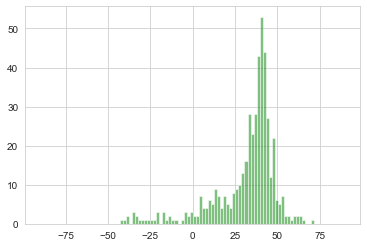

In [30]:
plt.hist(data['Lat'], bins=100, range = (-90, 90), color = 'green', alpha=.5)
;

''

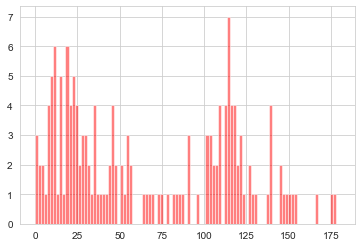

In [31]:
plt.hist(data['Long'], bins=100, range = (0, 180), color = 'red', alpha=.5)
;